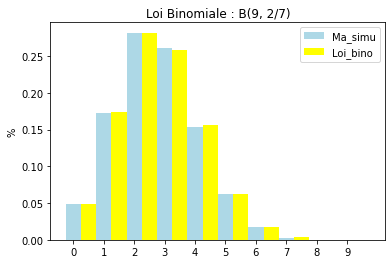

In [24]:
"""
Histoire de faire un peu d'algorithmique et de Python, je me suis amusé à programmer la loi binomiale.
Rappelons que si X est une variable aléatoire comptant le nombre de succès au cours de n répétitions avec une probabilité de succès égale à p, alors X suit une loi binomiale B(n,p).
La probabilité que X soit égale à k (k compris entre 0 et n) se calcule tel que : P(X=k) = (nk) pk (1-p)n-k avec (nk) pour le nombre de combinaisons de k dans n.
Je commence par importer les modules dont j'ai besoin sous Python.
"""

import numpy as np
import pandas as pd

#Je définis une première fonction qui renvoie le nombre de succès :
def simu_bino(n, p): # n = nombre d'expériences, p = probabilité de succès
    S = 0 # Succès
    i = 1 # Compteur
    while i <= n:
        E = np.random.random() # L'essai = tirage aléatoire entre 0 et 1
        if E >= (1 - p): # Si le tirage aléatoire est supérieur au seuil 1 - p, j'enregistre le succès
            S = S + 1
        i = i + 1
    return S
    
#J'en définis une deuxième pour "jouer" la première autant de fois qu'on le souhaiterait et stocker le résultat à chaque fois :
def aggr_bino(n, p, nreps): # Fonction d'aggrégation des résultats précédents
    j = 1 # Compteur
    while j <= nreps :
        if j == 1 :
            R = np.array(simu_bino(n, p)) # On alimente la liste avec le 1er résultat
        else :
            R = np.append(R, simu_bino(n, p)) # On alimente la liste avec les résultats suivants
        j = j+1
    return R
    
#Je vais exécuter ces fonctions avec les valeurs suivantes : B(9, 2/7)
res1 = pd.Series(aggr_bino(n=9, p=2/7, nreps=100000)).value_counts().sort_index()

#Afin de vérifier que je n'ai pas commis d'erreur, je vais comparer les résultats avec la loi binomiale programmée dans le module pandas (tellement utilisé sur la planète que je le vois mal encore entaché d'erreur !):
res2 = pd.Series(np.random.binomial(9, 2/7, 100000)).value_counts().sort_index()

#Je constitue un fichier unique et je calcule les proportions :
df = pd.concat([res1, res2], axis=1)
df = df / 100000

#Pour la comparaison, je privilégie le graphique :
import matplotlib.pyplot as plt
width = 0.5 # the width of the bars
fig, ax = plt.subplots()
g1 = ax.bar(np.arange(10), df[0], width, align='center', color='lightblue')
g2 = ax.bar(np.arange(10)+ width, df[1], width, align='center', color='yellow')
ax.set_title('Loi Binomiale : B(9, 2/7)')
ax.legend((g1[0], g2[0]), ('Ma_simu', 'Loi_bino'))
ax.set_ylabel('%')
ax.set_xticks(np.arange(10))
plt.show()
